In [1]:
import pandas as pd

# Carregar os dados
file_path = 'Dados_Trabalho_TP2.csv'
df = pd.read_csv(file_path)

# Verificar a dimensão do dataset
dimensao = df.shape

# Obter um sumário dos dados
sumario = df.info()

# Mostrar as primeiras linhas do dataset
primeiras_linhas = df.head()

dimensao, sumario, primeiras_linhas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2111 non-null   int64  
 1   Genero                        2111 non-null   object 
 2   Idade                         2111 non-null   float64
 3   Altura                        2111 non-null   float64
 4   Peso                          2111 non-null   float64
 5   Historico_obesidade_familiar  2111 non-null   object 
 6   FCCAC                         2111 non-null   object 
 7   FCV                           2111 non-null   float64
 8   NRP                           2111 non-null   float64
 9   CCER                          2111 non-null   object 
 10  Fumador                       2111 non-null   object 
 11  CA                            2111 non-null   float64
 12  MCC                           2111 non-null   object 
 13  FAF

((2111, 18),
 None,
    Unnamed: 0     Genero  Idade  Altura  Peso Historico_obesidade_familiar  \
 0           0   Feminino   21.0    1.62  64.0                          Sim   
 1           1   Feminino   21.0    1.52  56.0                          Sim   
 2           2  Masculino   23.0    1.80  77.0                          Sim   
 3           3  Masculino   27.0    1.80  87.0                          Nao   
 4           4  Masculino   22.0    1.78  89.8                          Nao   
 
   FCCAC  FCV  NRP            CCER Fumador   CA  MCC  FAF  TUDE  \
 0   Nao  2.0  3.0  Ocasionalmente     Nao  2.0  Nao  0.0   1.0   
 1   Nao  3.0  3.0  Ocasionalmente     Sim  3.0  Sim  3.0   0.0   
 2   Nao  2.0  3.0  Ocasionalmente     Nao  2.0  Nao  2.0   1.0   
 3   Nao  3.0  3.0  Ocasionalmente     Nao  2.0  Nao  2.0   0.0   
 4   Nao  2.0  1.0  Ocasionalmente     Nao  2.0  Nao  0.0   0.0   
 
               CBA                 TRANS                 Label  
 0             Nao  Transportes_Pub

In [2]:
# Calcular o IMC
df['IMC'] = df['Peso'] / ((df['Altura']) ** 2)

# Verificar a inclusão do novo atributo
df[['Peso', 'Altura', 'IMC']].head()

,Peso,Altura,IMC
0,64.0,1.62,24.386526
1,56.0,1.52,24.238227
2,77.0,1.80,23.765432
3,87.0,1.80,26.851852
4,89.8,1.78,28.342381


C:\Users\diogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


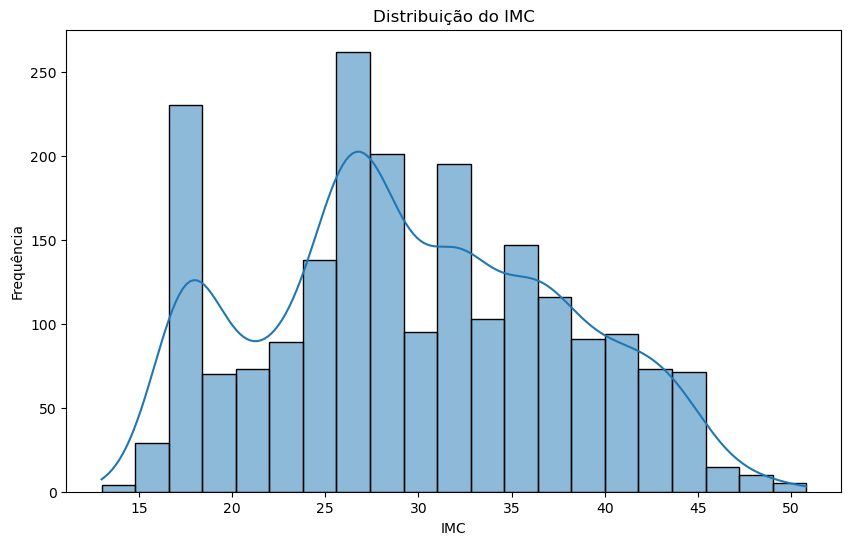

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição do IMC
plt.figure(figsize=(10, 6))
sns.histplot(df['IMC'], kde=True)
plt.title('Distribuição do IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()


In [18]:
#4 a)

# Identificação de valores ausentes
valores_ausentes = df.isnull().sum()

# Limpeza de dados ausentes (se aplicável)
df_cleaned = df.dropna()

valores_ausentes

Unnamed: 0                      0
Genero                          0
Idade                           0
Altura                          0
Peso                            0
Historico_obesidade_familiar    0
FCCAC                           0
FCV                             0
NRP                             0
CCER                            0
Fumador                         0
CA                              0
MCC                             0
FAF                             0
TUDE                            0
CBA                             0
TRANS                           0
Label                           0
IMC                             0
dtype: int64

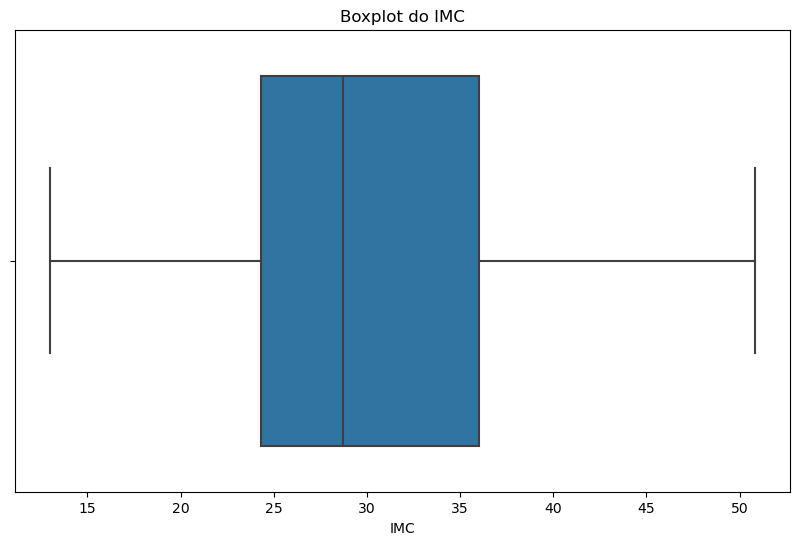

In [5]:
#b)
# Boxplot para identificar outliers no IMC
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['IMC'])
plt.title('Boxplot do IMC')
plt.show()

In [6]:
#c)
from sklearn.feature_selection import SelectKBest, f_classif

# Seleção de atributos usando ANOVA F-value
X = df_cleaned.drop(columns=['IMC', 'Label', 'Unnamed: 0', 'Genero', 'Historico_obesidade_familiar', 'FCCAC', 'CCER', 'Fumador', 'MCC', 'CBA', 'TRANS'])
y = df_cleaned['Label']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Obter scores dos atributos
scores = selector.scores_

# DataFrame com os scores dos atributos
atributos_selecionados = pd.DataFrame({
    'Atributo': X.columns,
    'Score': scores
}).sort_values(by='Score', ascending=False)

atributos_selecionados

,Atributo,Score
2,Peso,1452.245126
3,FCV,72.074753
0,Idade,55.266528
4,NRP,18.417692
1,Altura,16.465658
5,CA,14.850987
6,FAF,12.074367
7,TUDE,7.196755


In [7]:
#d)
from sklearn.preprocessing import StandardScaler

# Normalização dos dados numéricos
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Verificar a normalização
df_cleaned.head()

,Unnamed: 0,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,-1.731231,Feminino,-0.522124,-0.875589,-0.862558,Sim,Nao,-0.785019,0.404153,Ocasionalmente,Nao,-0.013073,Nao,-1.188039,0.561997,Nao,Transportes_Publicos,Peso_Normal,-0.663421
1,-1.729590,Feminino,-0.522124,-1.947599,-1.168077,Sim,Nao,1.088342,0.404153,Ocasionalmente,Sim,1.618759,Sim,2.339750,-1.080625,Ocasionalmente,Transportes_Publicos,Peso_Normal,-0.681937
2,-1.727949,Masculino,-0.206889,1.054029,-0.366090,Sim,Nao,-0.785019,0.404153,Ocasionalmente,Nao,-0.013073,Nao,1.163820,0.561997,Frequentemente,Transportes_Publicos,Peso_Normal,-0.740967
3,-1.726308,Masculino,0.423582,1.054029,0.015808,Nao,Nao,1.088342,0.404153,Ocasionalmente,Nao,-0.013073,Nao,1.163820,-1.080625,Frequentemente,Caminhada,Excesso_Peso_Grau_I,-0.355619
4,-1.724667,Masculino,-0.364507,0.839627,0.122740,Nao,Nao,-0.785019,-2.167023,Ocasionalmente,Nao,-0.013073,Nao,-1.188039,-1.080625,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,-0.169522


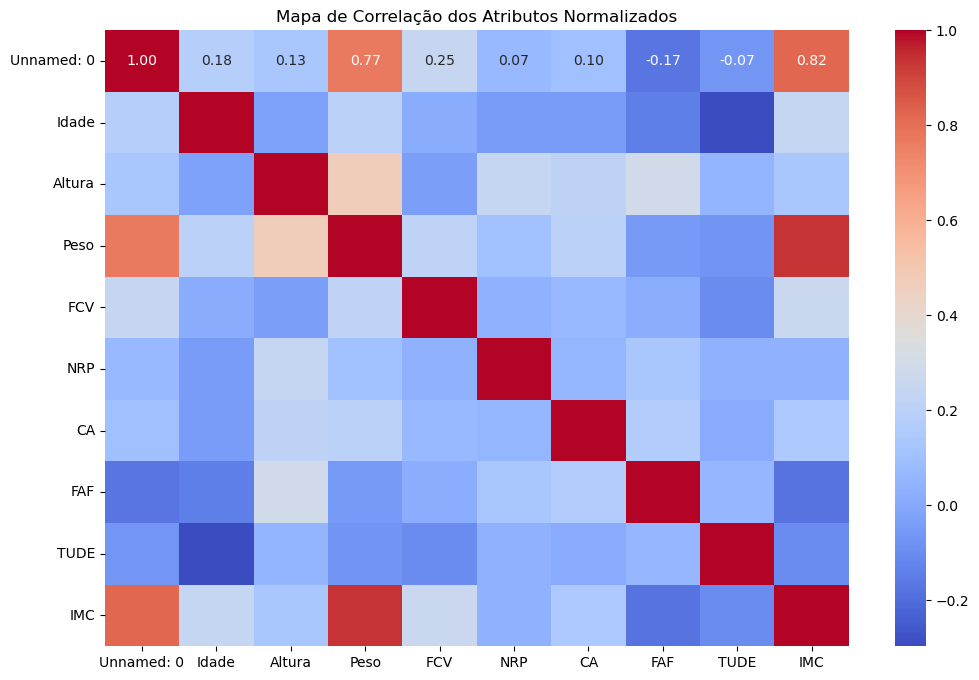

In [8]:
#5)
# Selecionar apenas colunas numéricas para calcular a correlação
df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
corr_matrix = df_numeric.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação dos Atributos Normalizados')
plt.show()

In [9]:
#6) 
#a)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Divisão dos dados em treino e teste
X = df[['Idade']]
y = df['IMC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação do modelo de regressão linear
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Função linear resultante
coeficiente = linear_regressor.coef_[0]
intercepto = linear_regressor.intercept_

f"IMC = {intercepto} + {coeficiente} * Idade"

'IMC = 22.483191977430625 + 0.29551479145047743 * Idade'

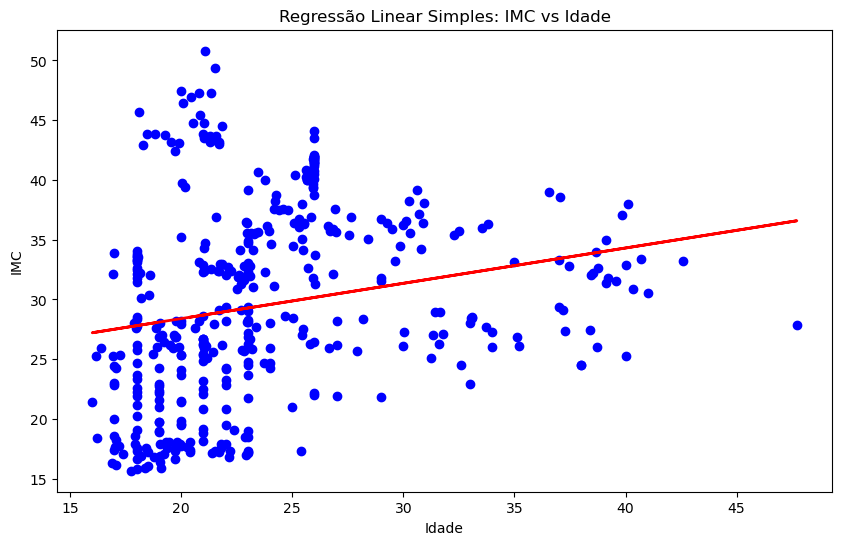

In [10]:
#b)
# Predições no conjunto de teste
y_pred = linear_regressor.predict(X_test)

# Visualização da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regressão Linear Simples: IMC vs Idade')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.show()

In [11]:
#c)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae, rmse

(6.548500510609817, 7.8498896126200375)

In [12]:
#d)
# Testar outra variável
X_alternative = df[['Peso']]
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alternative, y, test_size=0.2, random_state=42)

# Criação do modelo de regressão linear
linear_regressor_alt = LinearRegression()
linear_regressor_alt.fit(X_train_alt, y_train_alt)

# Predições no conjunto de teste
y_pred_alt = linear_regressor_alt.predict(X_test_alt)

# Avaliação do modelo
mae_alt = mean_absolute_error(y_test_alt, y_pred_alt)
rmse_alt = np.sqrt(mean_squared_error(y_test_alt, y_pred_alt))
mae_alt, rmse_alt

(2.318533697206287, 2.8696855013574636)

In [13]:
#7 a)
# Regressão linear múltipla
X_multi = df.drop(columns=['IMC', 'Label', 'Unnamed: 0', 'Genero', 'Historico_obesidade_familiar', 'FCCAC', 'CCER', 'Fumador', 'MCC', 'CBA', 'TRANS'])
y_multi = df['IMC']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

linear_regressor_multi = LinearRegression()
linear_regressor_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = linear_regressor_multi.predict(X_test_multi)

mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test_multi, y_pred_multi))
mae_multi, rmse_multi

(0.6308351963756391, 0.8211229894156361)

In [14]:
#b)
from sklearn.tree import DecisionTreeRegressor

# Árvore de regressão
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_multi, y_train_multi)
y_pred_tree = tree_regressor.predict(X_test_multi)

mae_tree = mean_absolute_error(y_test_multi, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test_multi, y_pred_tree))
mae_tree, rmse_tree

(0.40398946812335756, 0.7119272679242219)

In [15]:
#c)
from sklearn.neural_network import MLPRegressor

# Rede Neuronal
mlp_regressor = MLPRegressor(random_state=42, max_iter=1000)
mlp_regressor.fit(X_train_multi, y_train_multi)
y_pred_mlp = mlp_regressor.predict(X_test_multi)

mae_mlp = mean_absolute_error(y_test_multi, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test_multi, y_pred_mlp))
mae_mlp, rmse_mlp

(1.5186688029490896, 1.8972905427238453)

In [16]:
#8)
# Comparação dos resultados
resultados = pd.DataFrame({
    'Modelo': ['Regressão Linear Simples', 'Regressão Linear Múltipla', 'Árvore de Regressão', 'Rede Neuronal'],
    'MAE': [mae, mae_multi, mae_tree, mae_mlp],
    'RMSE': [rmse, rmse_multi, rmse_tree, rmse_mlp]
})

# Exibir os resultados
print(resultados)

                      Modelo       MAE      RMSE
0   Regressão Linear Simples  6.548501  7.849890
1  Regressão Linear Múltipla  0.630835  0.821123
2        Árvore de Regressão  0.403989  0.711927
3              Rede Neuronal  1.518669  1.897291


In [17]:
#9)


#4.2

#Preparação dos Dados
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# Carregar os dados
file_path = '/mnt/data/Dados_Trabalho_TP2.csv'
df = pd.read_csv(file_path)

# Derivar o atributo IMC
df['IMC'] = df['Peso'] / ((df['Altura']) ** 2)

# Selecionar os atributos relevantes e remover colunas desnecessárias
X_class = df.drop(columns=['IMC', 'Label', 'Unnamed: 0', 'Genero', 'Historico_obesidade_familiar', 'FCCAC', 'CCER', 'Fumador', 'MCC', 'CBA', 'TRANS'])
y_class = df['Label']

# Codificação das labels
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Dados_Trabalho_TP2.csv'

In [ ]:
#ARVORE DE DECISAO

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir o modelo de Árvore de Decisão
tree_clf = DecisionTreeClassifier(random_state=42)

# Definir a grade de parâmetros
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Executar a busca em grade com validação cruzada
grid_search_tree = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

# Melhor modelo encontrado
best_tree_model = grid_search_tree.best_estimator_
mean_score_tree = cross_val_score(best_tree_model, X_test, y_test, cv=5, scoring='accuracy').mean()
mean_score_tree

In [ ]:
from sklearn.svm import SVC

# Definir o modelo de SVM
svm_clf = SVC(random_state=42)

# Definir a grade de parâmetros
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Executar a busca em grade com validação cruzada
grid_search_svm = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Melhor modelo encontrado
best_svm_model = grid_search_svm.best_estimator_
mean_score_svm = cross_val_score(best_svm_model, X_test, y_test, cv=5, scoring='accuracy').mean()

mean_score_svm, grid_search_svm.best_params_

In [ ]:
#rede Neuronal

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Função para criar o modelo Keras
def create_model(optimizer='adam', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu', kernel_initializer=init))
    model.add(Dense(8, activation='relu', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Envolver o modelo Keras para uso com scikit-learn
keras_clf = KerasClassifier(build_fn=create_model, epochs=200, batch_size=10, verbose=0)

# Definir a grade de parâmetros
param_grid_nn = {
    'optimizer': ['adam', 'rmsprop'],
    'init': ['glorot_uniform', 'normal'],
    'epochs': [50, 100, 200],
    'batch_size': [5, 10, 20]
}

# Executar a busca em grade com validação cruzada
grid_search_nn = GridSearchCV(estimator=keras_clf, param_grid=param_grid_nn, cv=5)
grid_search_nn.fit(X_train, y_train)

# Melhor modelo encontrado
best_nn_model = grid_search_nn.best_estimator_
mean_score_nn = cross_val_score(best_nn_model, X_test, y_test, cv=5, scoring='accuracy').mean()
mean_score_nn

In [ ]:
#KKN
from sklearn.neighbors import KNeighborsClassifier

# Definir o modelo de KNN
knn_clf = KNeighborsClassifier()

# Definir a grade de parâmetros
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Executar a busca em grade com validação cruzada
grid_search_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Melhor modelo encontrado
best_knn_model = grid_search_knn.best_estimator_
mean_score_knn = cross_val_score(best_knn_model, X_test, y_test, cv=5, scoring='accuracy').mean()
mean_score_knn

In [22]:
#Comparação dos resultados dos modelos

# Criar um DataFrame com os resultados
resultados_classificacao = pd.DataFrame({
    'Modelo': ['Árvore de Decisão', 'SVM', 'Rede Neuronal', 'KNN'],
    'Média de Accuracy': [mean_score_tree, mean_score_svm, mean_score_nn, mean_score_knn],
    'Desvio Padrão': [grid_search_tree.cv_results_['std_test_score'][grid_search_tree.best_index_],
                      grid_search_svm.cv_results_['std_test_score'][grid_search_svm.best_index_],
                      grid_search_nn.cv_results_['std_test_score'][grid_search_nn.best_index_],
                      grid_search_knn.cv_results_['std_test_score'][grid_search_knn.best_index_]]
})

# Exibir os resultados
print(resultados_classificacao)

KeyError: "['IMC'] not found in axis"

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from scipy import stats

# Load the dataset
df = pd.read_csv('Dados_Trabalho_TP2.csv')

# Encode the 'Genero' attribute
label_encoder = LabelEncoder()
df['Genero'] = label_encoder.fit_transform(df['Genero'])

# Select features and target
X = df.drop(columns=['IMC', 'Label', 'Unnamed: 0', 'Historico_obesidade_familiar', 'FCCAC', 'CCER', 'Fumador', 'MCC', 'CBA', 'TRANS'])
y = df['Genero']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create Neural Network model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Neural Network model
nn_model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, verbose=0)
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')
mean_score_nn = np.mean(nn_scores)
std_score_nn = np.std(nn_scores)

# SVM model
svm_model = SVC(random_state=42, kernel='rbf', C=1, gamma='scale')
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
mean_score_svm = np.mean(svm_scores)
std_score_svm = np.std(svm_scores)

# Perform statistical significance test
t_statistic, p_value = stats.ttest_ind(nn_scores, svm_scores)

# Additional performance metrics
def get_metrics(model, X, y):
    y_pred = cross_val_predict(model, X, y, cv=5)
    accuracy = accuracy_score(y, y_pred)
    sensitivity = recall_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y, y_pred)
    return accuracy, sensitivity, specificity, f1

# Evaluate metrics for Neural Network
nn_model.fit(X_train, y_train)
nn_accuracy, nn_sensitivity, nn_specificity, nn_f1 = get_metrics(nn_model, X_train, y_train)

# Evaluate metrics for SVM
svm_model.fit(X_train, y_train)
svm_accuracy, svm_sensitivity, svm_specificity, svm_f1 = get_metrics(svm_model, X_train, y_train)

# Print results
print("Neural Network - Mean Accuracy: {:.2f}, Std: {:.2f}".format(mean_score_nn, std_score_nn))
print("SVM - Mean Accuracy: {:.2f}, Std: {:.2f}".format(mean_score_svm, std_score_svm))
print("P-value from statistical significance test: {:.5f}".format(p_value))

print("Neural Network - Accuracy: {:.2f}, Sensitivity: {:.2f}, Specificity: {:.2f}, F1 Score: {:.2f}".format(nn_accuracy, nn_sensitivity, nn_specificity, nn_f1))
print("SVM - Accuracy: {:.2f}, Sensitivity: {:.2f}, Specificity: {:.2f}, F1 Score: {:.2f}".format(svm_accuracy, svm_sensitivity, svm_specificity, svm_f1))
Explanation

ModuleNotFoundError: No module named 'keras'